# Data Understanding Feature Engineering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [2]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   race_url                      589865 non-null  object 
 1   race_name                     589865 non-null  object 
 2   points                        589388 non-null  float64
 3   uci_points                    251086 non-null  float64
 4   length                        589865 non-null  float64
 5   climb_total                   442820 non-null  float64
 6   profile                       441671 non-null  float64
 7   startlist_quality             589865 non-null  int64  
 8   date                          589865 non-null  object 
 9   position                      589859 non-null  float64
 10  cyclist_url                   589865 non-null  object 
 11  cyclist_age                   589752 non-null  float64
 12  mostly_tarmac                 589865 non-nul

In [4]:
'''
cyclist_bmi 
cyclist_age_group
cyclist_climb_power
cyclist_previous_experience
cyclist_days_since_last_race
race_physical_effort
race_prestige
'''

'\ncyclist_bmi \ncyclist_age_group\ncyclist_climb_power\ncyclist_previous_experience\ncyclist_days_since_last_race\nrace_physical_effort\nrace_prestige\n'

## Cyclist Understanding

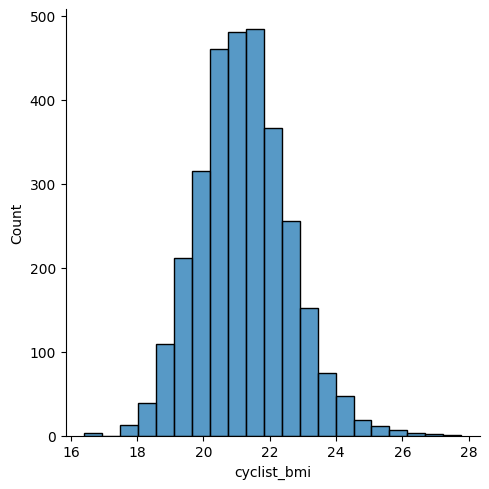

In [5]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_bmi', 'cyclist_url']), 
                x="cyclist_bmi", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

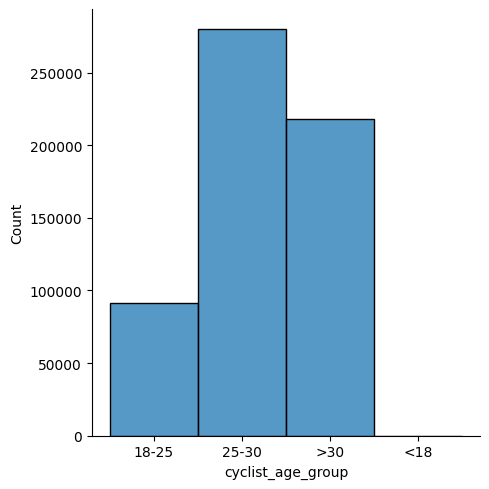

In [6]:
n_bins = dataset['cyclist_age_group'].nunique()

sb.displot(dataset, 
                x="cyclist_age_group", 
                kind="hist",
                row_order="desc",
                bins=n_bins) #TODO: fix labels' order

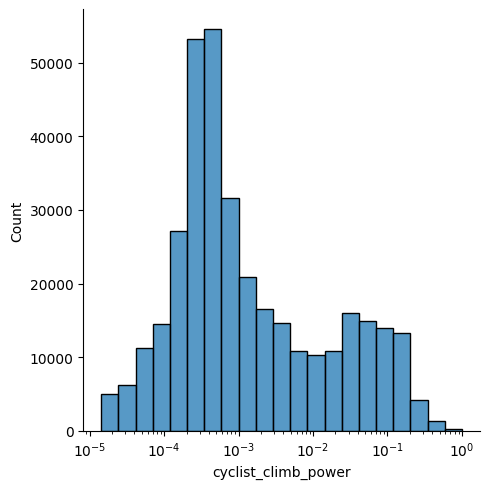

In [9]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_climb_power', 'cyclist_url', 'date']), 
                x="cyclist_climb_power", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)